In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from Bio import PDB
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

In [ ]:
def read_pdb_coord(input_pdb):
    """
    This function uses biopython package for consistency
    function that reads a pdb file and outputs the xyz coordinates of the atoms in it
    output is a tuple of this form : (x, y, z) where each coord is a list with all the coordinates
    """
    x_coord = []
    y_coord = []
    z_coord = []

    parser = PDB.PDBParser(QUIET=True)
    io = PDB.PDBIO()
    struct = parser.get_structure('easter_egg', input_pdb)

    for model in struct:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    x,y,z = atom.get_coord()
                    
                    # Append the coordinates to the lists
                    x_coord.append(x)
                    y_coord.append(y)
                    z_coord.append(z)
    return (x_coord, y_coord, z_coord)

def distance_between_bilayers(input_pdb_coord):

    data_whole = read_pdb_coord(input_pdb_coord)
    data = data_whole[2]
    data_mean = sum(data)/len(data)

    #separate the coordinates into two set of coordinates representing each individual bilayer
    bilayer_1 = []
    bilayer_2 = []
    for i in data:
        if i < data_mean:
            bilayer_1.append(i)
        else:
            bilayer_2.append(i)

    #compute average position along the z axis of each bilayer
    bilayer_1_mean = sum(bilayer_1)/len(bilayer_1)
    bilayer_2_mean = sum(bilayer_2)/len(bilayer_2)
    distance = bilayer_2_mean - bilayer_1_mean
    return distance, bilayer_1_mean, bilayer_2_mean

In [6]:
x, y, z = read_pdb_coord("/home/deider/memoire/experiences/project_ppm/thomas_barrel_cleaned.pdb")

In [27]:
distance_between_bilayers("/home/deider/memoire/experiences/project_ppm/thomas_barrel_ppm.pdb")

(17.39948674458944, 68.14909586649455, 85.54858261108399)

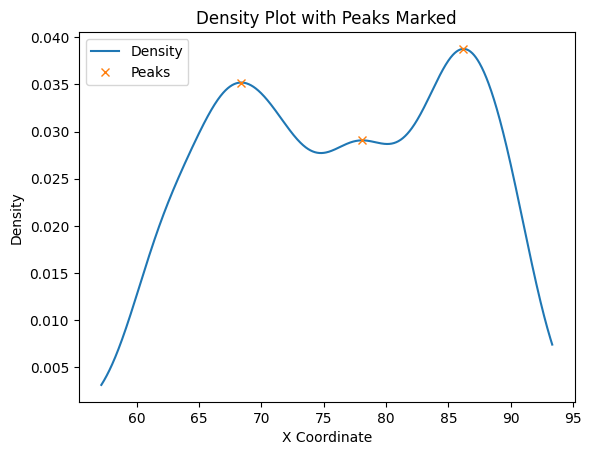

Peaks are located at: [68.38613065 78.08697828 86.19514944]
Distance between peaks: 17.809018796628663
Middle point: 73.23655446370444


In [12]:
0# Compute KDE using scipy's gaussian_kde
kde = gaussian_kde(z)
x_values = np.linspace(min(z), max(z), 1000)  # Define x range for KDE plot
density_values = kde(x_values)  # Evaluate the KDE on the x range

# Use find_peaks to identify the peaks in the density values
peaks, _ = find_peaks(density_values)

# Plot the KDE with peaks marked
plt.plot(x_values, density_values, label='Density')
plt.plot(x_values[peaks], density_values[peaks], "x", label='Peaks')  # mark the peaks
plt.xlabel("X Coordinate")
plt.ylabel("Density")
plt.legend()
plt.title("Density Plot with Peaks Marked")
plt.show()

# Output the peak locations for reference
peak_locations = x_values[peaks]
print("Peaks are located at:", peak_locations)
print("Distance between peaks:", peak_locations[-1]-peak_locations[0])
print("Middle point:", (peak_locations[1] + peak_locations[0])/2)

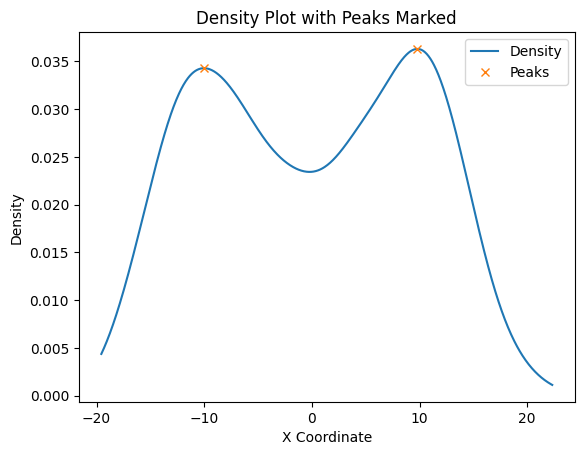

Peaks x axis are located at: [-10.04167816   9.79165214]
Distance between peaks: 19.833330301431808
Middle point: -0.12501300777400726


In [8]:
# Compute KDE using scipy's gaussian_kde
kde = gaussian_kde(x)
x_values = np.linspace(min(x), max(x), 1000)  # Define x range for KDE plot
density_values = kde(x_values)  # Evaluate the KDE on the x range

# Use find_peaks to identify the peaks in the density values
peaks, _ = find_peaks(density_values)

# Plot the KDE with peaks marked
plt.plot(x_values, density_values, label='Density')
plt.plot(x_values[peaks], density_values[peaks], "x", label='Peaks')  # mark the peaks
plt.xlabel("X Coordinate")
plt.ylabel("Density")
plt.legend()
plt.title("Density Plot with Peaks Marked")
plt.show()

# Output the peak locations for reference
peak_locations = x_values[peaks]
print("Peaks x axis are located at:", peak_locations)
print("Distance between peaks:", peak_locations[1]-peak_locations[0])
print("Middle point:", (peak_locations[1] + peak_locations[0])/2)

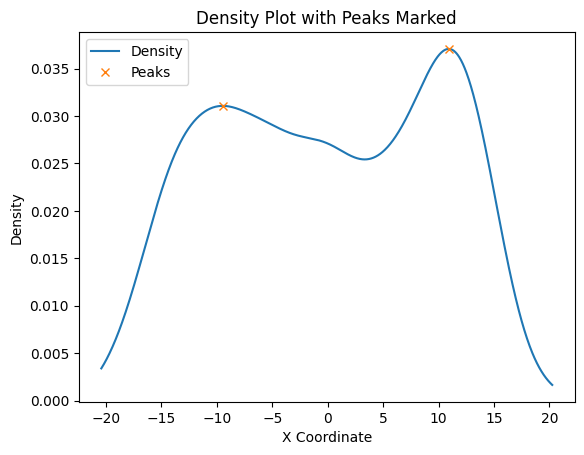

Peaks y axis are located at: [-9.46481916 10.93124694]
Distance between peaks: 20.396066104327595
Middle point: 0.7332138876776568


In [9]:
# Compute KDE using scipy's gaussian_kde
kde = gaussian_kde(y)
x_values = np.linspace(min(y), max(y), 1000)  # Define x range for KDE plot
density_values = kde(x_values)  # Evaluate the KDE on the x range

# Use find_peaks to identify the peaks in the density values
peaks, _ = find_peaks(density_values)

# Plot the KDE with peaks marked
plt.plot(x_values, density_values, label='Density')
plt.plot(x_values[peaks], density_values[peaks], "x", label='Peaks')  # mark the peaks
plt.xlabel("X Coordinate")
plt.ylabel("Density")
plt.legend()
plt.title("Density Plot with Peaks Marked")
plt.show()

# Output the peak locations for reference
peak_locations = x_values[peaks]
print("Peaks y axis are located at:", peak_locations)
print("Distance between peaks:", peak_locations[1]-peak_locations[0])
print("Middle point:", (peak_locations[1] + peak_locations[0])/2)

In [13]:
def find_x_data(x):
    """
    returns the the value on x where we can find borders of the TMB as well as the middle point 
    """
    # Compute KDE using scipy's gaussian_kde
    kde = gaussian_kde(x)
    x_values = np.linspace(min(x), max(x), 1000)  # Define x range for KDE plot
    density_values = kde(x_values)  # Evaluate the KDE on the x range

    # Use find_peaks to identify the peaks in the density values
    peaks, _ = find_peaks(density_values)

    # Output the peak locations for reference
    peak_locations = x_values[peaks]
    x1 = peak_locations[0]
    x2 = peak_locations[-1]
    mid_x = (x1 + x2)/2
    return x1, x2, mid_x

In [14]:
find_x_data(x)

(-10.04167815848991, 9.791652142941896, -0.12501300777400726)

In [15]:
def read_pdb_coord(input_pdb):
    """
    This function uses biopython package for consistency
    function that reads a pdb file and outputs the xyz coordinates of the atoms in it
    output is a tuple of this form : (x, y,bz) where each coord is a list with all the coordinates
    """
    x_coord = []
    y_coord = []
    z_coord = []

    parser = PDB.PDBParser(QUIET=True)
    io = PDB.PDBIO()
    struct = parser.get_structure('easter_egg', input_pdb)

    for model in struct:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    x,y,z = atom.get_coord()
                    
                    # Append the coordinates to the lists
                    x_coord.append(x)
                    y_coord.append(y)
                    z_coord.append(z)
    return (x_coord, y_coord, z_coord)

def read_pdb_coord_window(input_pdb, z_height, window_size=10):
    """
    This function uses biopython package for consistency
    function that reads a pdb file and outputs the xyz coordinates of the atoms in it
    output is a tuple of this form : (x, y,bz) where each coord is a list with all the coordinates
    """
    x_coord = []
    y_coord = []
    z_coord = []

    parser = PDB.PDBParser(QUIET=True)
    io = PDB.PDBIO()
    struct = parser.get_structure('easter_egg', input_pdb)

    for model in struct:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    x,y,z = atom.get_coord()
                    if z > z_height-(window_size/2) and z < z_height+(window_size/2):
                        if atom.name in ["N", "CA", "C1"]:
                            # Append the coordinates to the lists
                            x_coord.append(x)
                            y_coord.append(y)
                            z_coord.append(z)
    return (x_coord, y_coord, z_coord)
    

def find_z1(z):
    """
    function for when I remove one of the md membrane to only look for one peak
    """
    # Compute KDE using scipy's gaussian_kde
    kde = gaussian_kde(z)
    z_values = np.linspace(min(z), max(z), 1000)  # Define x range for KDE plot
    density_values = kde(z_values)  # Evaluate the KDE on the x range

    # Use find_peaks to identify the peaks in the density values
    peaks, _ = find_peaks(density_values)
    # Output the peak locations for reference
    peak_locations = z_values[peaks]
    return peak_locations[0]


def find_z1_and_z2(z):
    """
    Find at which values of z the bilayers are found
    """
    # Compute KDE using scipy's gaussian_kde
    kde = gaussian_kde(z)
    z_values = np.linspace(min(z), max(z), 1000)  # Define x range for KDE plot
    density_values = kde(z_values)  # Evaluate the KDE on the x range

    # Use find_peaks to identify the peaks in the density values
    peaks, _ = find_peaks(density_values)
    # Output the peak locations for reference
    peak_locations = z_values[peaks]
    z1 = peak_locations[0]
    z2 = peak_locations[1]
    mid_z = (z1 + z2)/2
    return z1, z2, mid_z

def find_x_data(x):
    """
    returns the the value on x where we can find borders of the TMB as well as the middle point 
    """
    # Compute KDE using scipy's gaussian_kde
    kde = gaussian_kde(x)
    x_values = np.linspace(min(x), max(x), 1000)  # Define x range for KDE plot
    density_values = kde(x_values)  # Evaluate the KDE on the x range

    # Use find_peaks to identify the peaks in the density values
    peaks, _ = find_peaks(density_values)

    # Output the peak locations for reference
    peak_locations = x_values[peaks]
    x1 = peak_locations[0]
    x2 = peak_locations[-1]
    mid_x = (x1 + x2)/2
    return x1, x2, mid_x

def find_y_data(y):
    # Compute KDE using scipy's gaussian_kde
    kde = gaussian_kde(y)
    y_values = np.linspace(min(y), max(y), 1000)  # Define x range for KDE plot
    density_values = kde(y_values)  # Evaluate the KDE on the x range

    # Use find_peaks to identify the peaks in the density values
    peaks, _ = find_peaks(density_values)

    # Output the peak locations for reference
    peak_locations = y_values[peaks]
    y1 = peak_locations[0]
    y2 = peak_locations[1]
    mid_y = (y1 + y2)/2
    return y1, y2, mid_y


def get_radius_pore_centers(input_tmb, z_height):
    """
    returns, radius, cicrle center x and circle center y"""
    x, y, z = read_pdb_coord_window(input_tmb, z_height) 
    data_x = find_x_data(x)
    data_y = find_y_data(y)
    pore_center_x = data_x[2]
    pore_center_y = data_y[2]
    radius = ((data_x[1]-data_x[0]) + (data_y[1] - data_y[0]))/2
    return radius, pore_center_x, pore_center_y

In [23]:
get_radius_pore_centers("/home/deider/memoire/experiences/project_ppm/thomas_barrel_cleaned.pdb", 1)

ValueError: `dataset` input should have multiple elements.

In [22]:
get_radius_pore_centers('/home/deider/memoire/experiences/projet_modulable_bilayer/inputs/1bxw_default_dppc-tail-contacts.pdb', 35)

(11.341100845489656, 59.47058996710334, 50.954073780888436)

In [20]:
print(gaussian_kde(x))